In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

##### Data Import

In [10]:
df = pd.read_csv('C:/Users/gaura/Desktop/Professional/Data-Science/Machine Learning/Final Projects/ML case Study.csv' , header = 0)
df_colg = pd.read_csv ('C:/Users/gaura/Desktop/Professional/Data-Science/Machine Learning/Final Projects/Colleges.csv', header = 0)
df_cities = pd.read_csv('C:/Users/gaura/Desktop/Professional/Data-Science/Machine Learning/Final Projects/cities.csv', header= 0 )

* df_colg is DataFrame for colleges csv
* df_cities is DataFrame for cities csv

In [8]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [11]:
df_colg.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [12]:
df_cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


## Data Preprocessing
### Listing colleges as Tier-1 , Tier- 2 , Tier-3

In [22]:
Tier1 = df_colg["Tier 1"].tolist()
Tier2 = df_colg["Tier 2"].tolist()
Tier3 = df_colg["Tier 3"].tolist()


In [19]:
Tier1

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [38]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace = True)

In [27]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


### Listing Cities as Metro and Non-metro

In [29]:
metro = df_cities["Metrio City"].tolist()


In [39]:
non_metro = df_cities["non-metro cities"].tolist()

In [41]:
for city in df.City:
    if city in metro:
        df["City"].replace(city,1,inplace = True)
    elif city in non_metro:
        df["City"].replace(city,0,inplace = True)

In [43]:
df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10
5,2,0,Executive,54340.0,4,73,31,59950.89
6,3,1,Executive,60298.0,1,42,46,66602.34
7,2,1,Executive,49944.0,2,56,37,57768.44
8,3,1,Executive,53124.0,4,40,37,70083.30
9,1,0,Executive,51141.0,1,47,60,85648.48


* Now We need to assign Numerical Varaibles to the Cities which is catregorical in Nature

In [53]:
df = pd.get_dummies(df)
df=df.astype(int)

In [54]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523,3,66,19,71406,0,1
1,2,0,57081,1,84,18,68005,1,0
2,3,0,60347,2,52,28,76764,1,0
3,3,0,49010,2,81,33,82092,1,0
4,1,0,57879,4,74,32,73878,1,0


#### Check for Missing Values

In [59]:
missing_values = df.isnull()
total_missing = missing_values.sum().sum()

if total_missing == 0:
    print("No missing values detected")
else:
    print("Missing values detected")
    print("\nTotal Missing values:\n", missing_values.sum())

No missing values detected


* we have no missing Values in the Data set

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   College              1589 non-null   int32
 1   City                 1589 non-null   int32
 2   Previous CTC         1589 non-null   int32
 3   Previous job change  1589 non-null   int32
 4   Graduation Marks     1589 non-null   int32
 5   EXP (Month)          1589 non-null   int32
 6   CTC                  1589 non-null   int32
 7   Role_Executive       1589 non-null   int32
 8   Role_Manager         1589 non-null   int32
dtypes: int32(9)
memory usage: 56.0 KB


* We can check the info as well that there is no missing value

### Outliers detection and Treatment

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


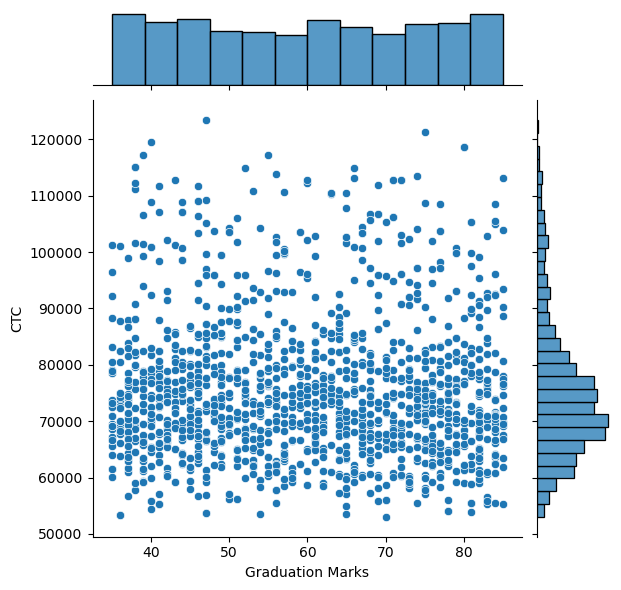

In [60]:
sns.jointplot(x = "Graduation Marks",y = "CTC",data = df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


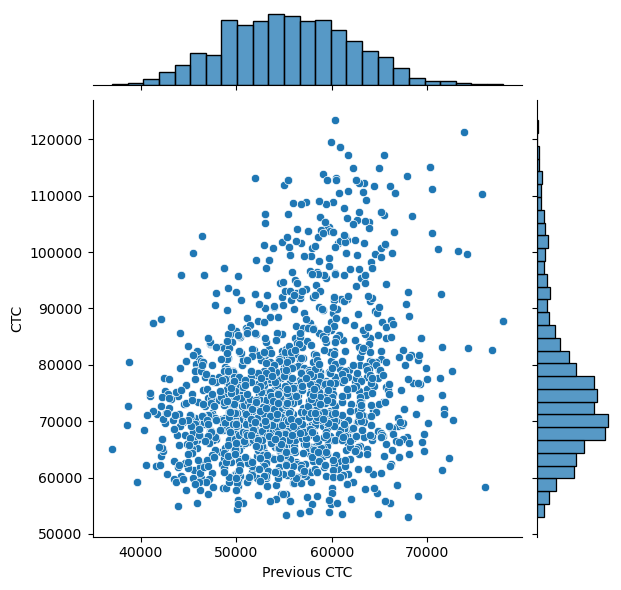

In [61]:
sns.jointplot(x = "Previous CTC",y = "CTC",data = df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


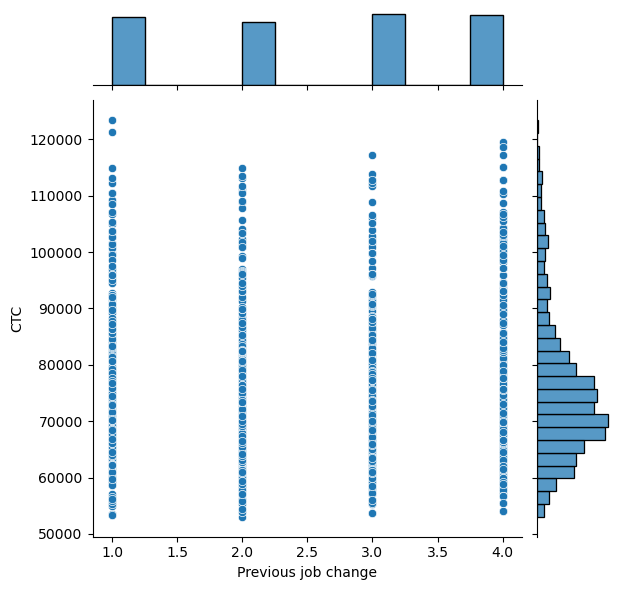

In [62]:
sns.jointplot(x = "Previous job change",y = "CTC",data = df)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


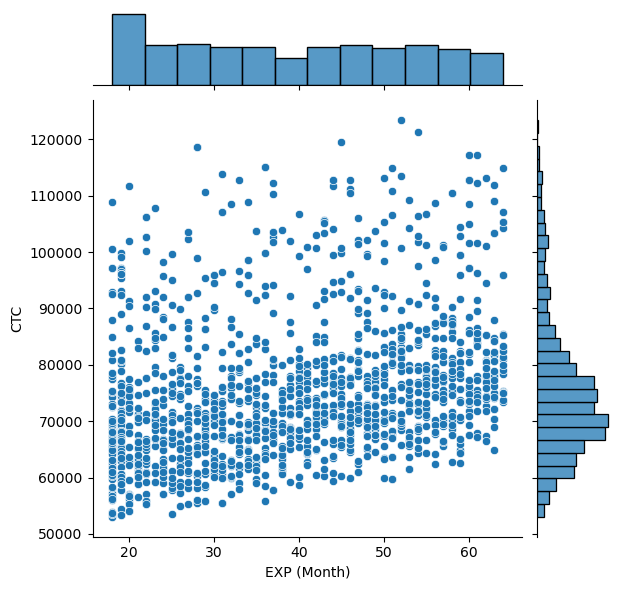

In [63]:
sns.jointplot(x = "EXP (Month)",y = "CTC",data = df)

##### Detection : We have no significant Outlier in the above data that can impact our model

## <u> <b >Designing the ML Model 

#### After preprocessing of data here comes the key part i.e, model designing

### <b> Model 1 : Muliple Linear Regression 

####  We can only perdorm <u> Regression </u> because the variable is <b> Continuous </b>and not <b> Discrete or  categorical

###   Using Statsmodels 

In [65]:
import statsmodels.api as sn

In [66]:
X_multi = df.loc[:, df.columns !="CTC"]

In [67]:
y_multi = df['CTC']

In [68]:
X_multi_cons = sn.add_constant(X_multi)

In [69]:
X_multi.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager
0,2,0,55523,3,66,19,0,1
1,2,0,57081,1,84,18,1,0
2,3,0,60347,2,52,28,1,0
3,3,0,49010,2,81,33,1,0
4,1,0,57879,4,74,32,1,0


In [70]:
y_multi.head()

0    71406
1    68005
2    76764
3    82092
4    73878
Name: CTC, dtype: int32

In [72]:
X_multi_cons.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager
0,1.0,2,0,55523,3,66,19,0,1
1,1.0,2,0,57081,1,84,18,1,0
2,1.0,3,0,60347,2,52,28,1,0
3,1.0,3,0,49010,2,81,33,1,0
4,1.0,1,0,57879,4,74,32,1,0


In [82]:
lm_multi  = sn.OLS(y_multi, X_multi_cons).fit()

In [74]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          4.71e-257
Time:                        18:45:55   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.211e+04   1463.782     21.936      0.000    2.92e+04     3.5e+04
College              -481.5171    258.382     -1.864      0.063    -988.324      25.290
City                  380.8471    433.456      0.879      0.380    -469.362    1231.056
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5629    192.887      0.656      0.512    -251.779     504.905
Graduation Marks        6.2366     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3459     15.460     16.904      0.000     231.021     291.671
Role_Executive       6311.1041    760.862      8.295      0.000    4818.699    7803.509
Role_Manager          2.58e+04    797.099     32.365      0.000    2.42e+04    2.74e+04
==============================================================================
Omnibus:                       49.727   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.300
Skew:                           0.408   Prob(JB):                     9.81e-13
Kurtosis:                       3.411   Cond. No.                     1.00e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###   Using SkLearn 

In [76]:
from sklearn.linear_model import LinearRegression

In [79]:
lm_multi_lr = LinearRegression()

In [80]:
lm_multi_lr.fit(X_multi, y_multi)

LinearRegression()

* The model has been fitted with multiple regression

In [91]:
print ("The Intercept is:",(lm_multi_lr.intercept_))

The Intercept is: 48164.42864124831


In [87]:
print ("The Coefficient is:",(lm_multi_lr.coef_))

The Coefficient is: [-4.81517095e+02  3.80847147e+02  4.10087094e-01  1.26562908e+02
  6.23658369e+00  2.61345898e+02 -9.74370550e+03  9.74370550e+03]


In [92]:
y_pred = lm_multi_lr.predict(X_multi)

In [93]:
print ("Predicted value of y is :",y_pred)

Predicted value of y is : [85471.24094881 66220.53244111 69618.81100318 ... 62202.16429637
 67535.88758095 81066.19861607]


In [100]:
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
mse = mean_squared_error(y_multi,y_pred)

In [99]:
print ("Mean Squared Error is:", mse)

Mean Squared Error is: 73736682.98816136


In [101]:
r2 = r2_score(y_multi,y_pred)

In [197]:
print ("R-squared value--- ",(r2))

R-squared value---  0.5356040462077147


### <b> Model 2 : Decision Tree Regressor 

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = df.loc[:,df.columns!="CTC"]

In [110]:
y = df["CTC"]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

#### We will split the Train:Test data in 80:20 ratio

In [112]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


In [114]:
from sklearn import tree
from IPython.display import Image

In [115]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [116]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [117]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [200]:
mse_dt = mean_squared_error(y_test, y_test_pred)
r2_dt = r2_score(y_test, y_test_pred)

In [201]:
print("Mean Squared Error - ",mse_dt)

Mean Squared Error -  60424955.67874997


In [202]:
print("R squared value- ",r2_dt)

R squared value-  0.5927814236522648


In [123]:
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [121]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled = True)

In [122]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

### <b> Model 3 : Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf = RandomForestRegressor(n_estimators=250, random_state=42)  

In [127]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [209]:
pred_rf = rf.predict(X_test)

In [210]:
mse_rf = mean_squared_error(y_test, pred_rf)
r2_rf = r2_score(y_test, pred_rf)

In [211]:
print("Mean Squared Error - ",mse_rf)

Mean Squared Error -  50183252.63336242


In [212]:
print("R squared value  - ",r2_rf)

R squared value  -  0.6618027689999071


### <b> Model 4 :Gradient Boosting Machines Regressor

In [133]:
from sklearn.ensemble import GradientBoostingRegressor

In [135]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [136]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=42)

In [213]:
pred_gb = model.predict(X_test)

In [214]:
mse_gb = mean_squared_error(y_test, pred_gb)
r2_gb = r2_score(y_test,pred_gb)

In [215]:
print("Mean Squared Error - ",mse_gb)

Mean Squared Error -  54039363.0215319


In [216]:
print("R squared value - ",r2_gb)

R squared value -  0.6358154966077103


### <b> Model 5 : XGBoost Regressor

In [141]:
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [142]:
m5 = XGBRegressor(n_estimators = 250, max_depth = 5, learning_rate = 0.1)

NameError: name 'XGBRegressor' is not defined

In [ ]:
m5.fit(X_train, y_train)

In [ ]:
pred_xg = m5.predict(X_test)

In [ ]:
mse_xg = mean_squared_error(y_test, pred_xg)
r2_xg = r2_score(y_test, pred_xg)

In [ ]:
print("Mean Squared Error - ",mse_xg)

In [238]:
print(" R squared value",r2_xg)

NameError: name 'r2_xg' is not defined

### <b> Model 6 : Ridge Regression

##### Standardizing

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
from sklearn.linear_model import Ridge

In [146]:
scaler = StandardScaler()

In [147]:
scaler.fit(X_train)

StandardScaler()

In [148]:
X_train_s = scaler.transform(X_train)

In [149]:
X_test_s = scaler.transform(X_test)

In [217]:
lm_rr = Ridge(alpha = 0.5)

In [218]:
lm_rr.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [219]:
y_pred = lm_rr.predict(X_test_s)

In [220]:
mse_rr = mean_squared_error(y_test, y_pred)
r2_rr = r2_score(y_test, y_pred)

In [221]:
print("Mean Squared Error - ",mse_rr)

Mean Squared Error -  68910704.9246653


In [222]:
print(" R squared value ",r2_rr)

 R squared value  0.5355938810492217


#### Changing Hyper Parameters 

In [157]:
from sklearn.model_selection import validation_curve

In [158]:
param_range = np.logspace(-2,8,100)

In [159]:
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [160]:
train_mean = np.mean(train_scores, axis = 1)

In [161]:
test_mean = np.mean(test_scores, axis = 1)

In [162]:
max(test_mean)

0.5258378890157409

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


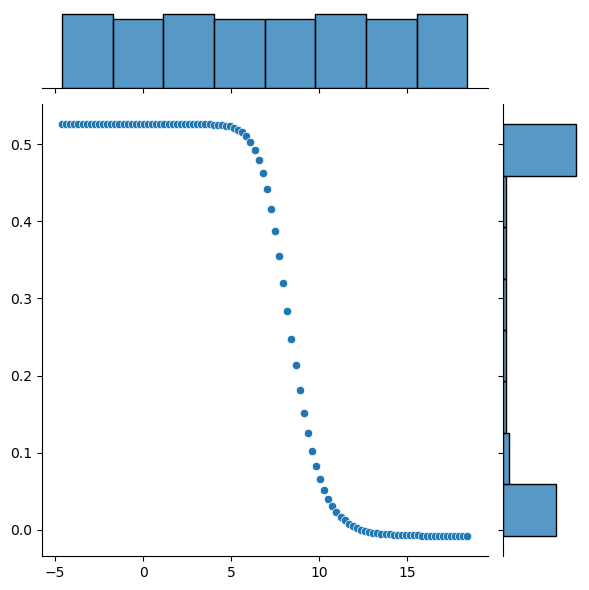

In [163]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [164]:
np.where(test_mean == max(test_mean))

(array([30], dtype=int64),)

In [165]:
param_range[30]

10.722672220103231

In [166]:
lm_r_best = Ridge(alpha = param_range[30])

In [167]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

In [168]:
y_pred_best = lm_r.predict(X_test_s)

In [170]:
print (y_pred_best)

[69232.56513377 64372.45969452 63324.46697207 72171.11353395
 76839.69410892 88920.08765237 69395.08992801 71543.41057483
 71112.02249773 73778.84702471 71864.11671957 78216.03835541
 85583.99557555 78267.42156696 77258.80032291 93649.01345404
 65998.72095251 68652.90648004 66854.44467288 81437.39755612
 91369.41461061 96244.57069874 71343.24919549 67627.90314328
 72748.71213118 67871.98654783 73777.68079705 94194.93044778
 72283.18346677 74552.87303397 68574.76478637 69557.89782221
 85134.23711101 80180.10855979 98393.1938071  79965.81852585
 71508.98731841 80931.2360083  73625.66616846 65916.90395848
 71615.49472058 88076.16345904 73177.12008102 67988.16326156
 75116.08149946 78376.91390257 86670.8427959  67782.25687877
 69600.63350096 76797.99841287 90346.52037645 69913.89111957
 91756.74062558 72753.80132627 90052.154812   69597.3621327
 68044.35519125 89338.762582   68937.86713002 69663.3402304
 74515.80701479 74210.02972401 70167.62645155 68605.56980904
 63519.05099633 74954.0608

In [226]:
mse_rr1 = mean_squared_error(y_test, y_pred_best)

In [224]:
r2_rr1 = r2_score(y_test,y_pred_best)

In [227]:
print (" mse is :",mse_rr1)

 mse is : 68909196.57193513


In [225]:
print (" The R squared vallue is :",r2_rr1)

 The R squared vallue is : 0.5356040462077147


### <b> Model 7 :  Lasso Regression

In [177]:
from sklearn.linear_model import Lasso

In [228]:
lm_lasso = Lasso(alpha = 0.5)

In [229]:
lm_lasso.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [230]:
y_pred_lasso = lm_s.predict(X_test_s)

In [231]:
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

In [232]:
print("Mean Squared Error - ",mse_lasso)

Mean Squared Error -  68910704.9246653


In [233]:
print(" R squared value - ",r2_lasso)

 R squared value -  0.5355938810492217


#### Changing Hyper Parameters

In [184]:
from sklearn.model_selection import validation_curve

In [185]:
param_range = np.logspace(-2,8,100)

In [186]:
train_scores, test_scores = validation_curve(
  Lasso(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [187]:
train_mean = np.mean(train_scores, axis = 1)

In [188]:
test_mean = np.mean(test_scores, axis = 1)

In [189]:
max(test_mean)

0.525833050754811

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


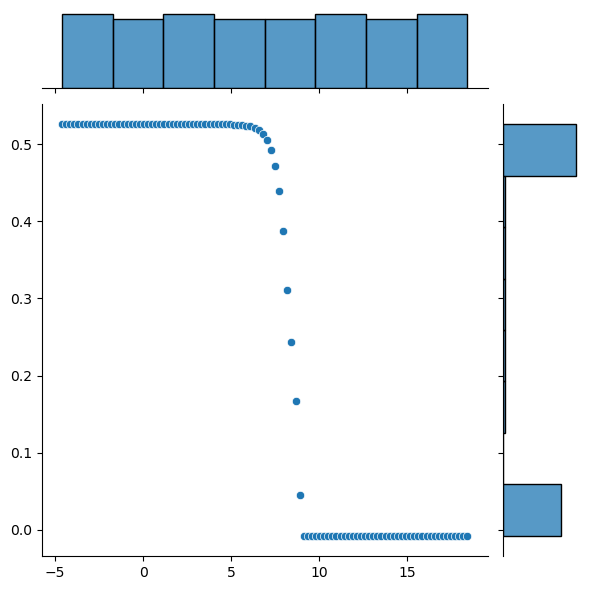

In [190]:
sns.jointplot(x=np.log(param_range),y = test_mean)

In [191]:
np.where(test_mean == max(test_mean))

(array([36], dtype=int64),)

In [192]:
param_range[36]

43.28761281083057

In [234]:
lm_lasso_best = Lasso(alpha = param_range[36])

In [235]:
lm_lasso_best.fit(X_train_s,y_train)

Lasso(alpha=43.28761281083057)

In [236]:
y_pred_best = lm_s.predict(X_test_s)

In [237]:
r2_score(y_test,y_pred_best)

0.5356040462077147

### <u> Comparision of Different Models :



#### R square Values of Different Models 

###  Multiple Linear Regression :      0.5356040462077147   
                               

###   Decision Tree             :      0.5927814236522648
                                 

###   Random Forest Regressor   :      0.6618027689999071
                                  

### Gradient Boosting           :      0.6358154966077103
                                

###  XGBoost Regressor          :      0.5927831611924911     
                                 

###  Ridge Regression           :      0.5356040462077147
                                  

###  Lasso Regression           :      0.5356040462077147
                                  

## Questions : 

### 1 Your views about the problem statement?


 *  The problem statement talks about the TechWorks Consulting's approach towards data driven approach in predicting the salary of the 
 new employees. It deals with objective and data approach rather that intutive business decisions. 
 * Predicting employee salaries based on various features such as experience, education, and location is a practical application of machine learning.
 * This task not only helps ensure fair and competitive compensation but also streamlines the hiring process by providing data-driven insights.
   The statement throws light on the application of machine learning and data in solving business problems


### 2 What will be your approach to solving this task?

My approach involves understing business scenario  and try to comprehend possible solutions in solving this problem.
Initially I will get the brids eye view of the data and then following the following approach :

   #### Data Exploration:
    *  Load the Data 
    *  Check for missing values, data types, and null values.
    *  isualize the data using appropriate graphs.

   #### Data Preprocessing:
    *   Handle missing values appropriately - Either delete the vaues or replace the numerical values with the mean of total
    *   Convert categorical variables into numerical representations:
    *   Identify Outliers and treat the Outliers
    *   Normalize or standardize numerical features if necessary.

   ####  Model Selection and Training:
    *   Split the data into training and testing sets. (Train - Test ration -----  80:20 )
    *   Train multiple regression models example :
                *    Linear Regression
                *    Decision tree Regressor
                *    Random Forest Regressor
                *    Gradient Boosting Machine Regressor
                *    XGBoost
                *    Ridge Regression
                *    Lasso Regression

   ####  Model Evaluation

         * Evaluate the results of above mntioned models by looking at the parameters like :
            Mean Squared Error (MSE)
            R - squared Value

   ####  Predictive Analysis:

          * Use the trained model to predict salaries for new employees.
          * Validate the model’s predictions with appropriate statistical methods.  

   #### Draw Conclusion 
              * Draw the conclusion of the all the statistical models and document the results  
  

### 3 What were the available ML model options you had to perform this task? 

   * Looking at the availavble data and case requirement the following ML models are available to perform the optimozed operation


* Linear Regression
* Decision tree Regressor
* Random Forest Regressor
* Gradient Boosting Machine Regressor
* XGBoost
* Ridge Regression
* Lasso Regressionession


### 4 Which model’s performance is best and what could be the possible reason for that?

           To detect the best model we can check the R-Square value of the models.
           Maximum R square value shows the best fit of the model

           So the best Model is Random Forest Regression , having R2_score : 0.6618027689999071

### 5 What steps can you take to improve this selected model’s performance even further?

  The following steps can be taken : 

   * Gathering adquate data -  get more diverse sample size
   * Fine-tuning model hyperparameters ensures optimal performance.
   * use more advanced method like Ensemble Method. 
   * Implement k-fold cross-validation to ensure the model's robustness and reduce overfitting.
   * Apart from testing multiple variables at a time , also check the impact of individeual independent vairables on the dependent one.